In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised=True)

In [4]:
tokenizer = info.features['text'].encoder

In [7]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64


train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = "binary_crossentropy",
             optimizer = 'adam',
             metrics=['accuracy'])

In [12]:
NUM_EPOCHS=10

In [13]:
history = model.fit(train_dataset, epochs = NUM_EPOCHS,
                   validation_data = test_dataset)

Epoch 1/10
140/391 [=========>....................] - ETA: 10:34 - loss: 0.6453 - accuracy: 0.6156

KeyboardInterrupt: 

It was too slow. So I had to stop and move on to the next model

In [14]:
### MUltilayer GRU

In [15]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
NUM_EPOCHS = 10
history1 = model1.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 84s 214ms/step - loss: 0.4570 - accuracy: 0.7732 - val_loss: 0.3195 - val_accuracy: 0.8731
Epoch 2/10
391/391 [==============================] - 83s 211ms/step - loss: 0.2250 - accuracy: 0.9153 - val_loss: 0.2991 - val_accuracy: 0.8782
Epoch 3/10
391/391 [==============================] - 86s 220ms/step - loss: 0.1724 - accuracy: 0.9365 - val_loss: 0.3314 - val_accuracy: 0.8733
Epoch 4/10
391/391 [==============================] - 85s 217ms/step - loss: 0.1399 - accuracy: 0.9500 - val_loss: 0.3541 - val_accuracy: 0.8699
Epoch 5/10
391/391 [==============================] - 87s 222ms/step - loss: 0.1141 - accuracy: 0.9608 - val_loss: 0.3796 - val_accuracy: 0.8658
Epoch 6/10
391/391 [==============================] - 86s 221ms/step - loss: 0.0893 - accuracy: 0.9703 - val_loss: 0.4970 - val_accuracy: 0.8585
Epoch 7/10
391/391 [==============================] - 87s 222ms/step - loss: 0.0728 - accuracy: 0.9769 - val_loss: 0.5462 - val_ac

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

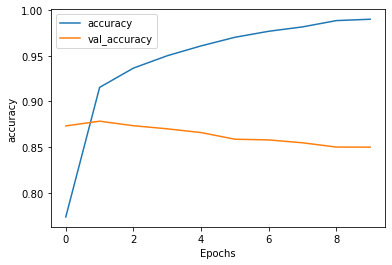

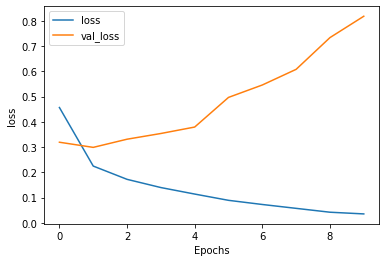

In [21]:
plot_graphs(history1, 'accuracy')
plot_graphs(history1, 'loss')

In [22]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
embedding_dim = 64
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [25]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 10

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history3 = model3.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 14s 34ms/step - loss: 0.5194 - accuracy: 0.8077 - val_loss: 0.4748 - val_accuracy: 0.7941
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 0.3814 - accuracy: 0.8655 - val_loss: 0.3866 - val_accuracy: 0.8324
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 0.3076 - accuracy: 0.8885 - val_loss: 0.3300 - val_accuracy: 0.8738
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 0.2613 - accuracy: 0.9086 - val_loss: 0.3131 - val_accuracy: 0.8769
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 0.2334 - accuracy: 0.9166 - val_loss: 0.3126 - val_accuracy: 0.8772
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 0.2142 - accuracy: 0.9213 - val_loss: 0.3056 - val_accuracy: 0.8815
Epoch 7/10
391/391 [==============================] - 13s 34ms/step - loss: 0.1942 - accuracy: 0.9306 - val_loss: 0.3096 - val_accuracy:

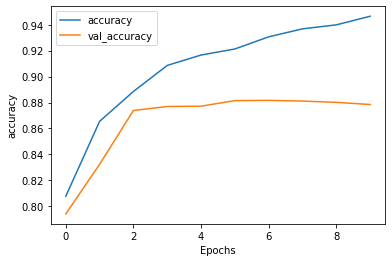

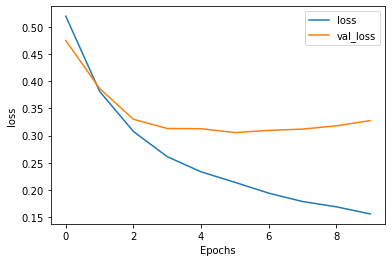

In [28]:
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")